In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join
from datetime import datetime
import numpy as np

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Merge 12 monthos of sales data into a single csv file

In [3]:
# Get list of all data resources
mypath = "./Sales_Data/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath,f))]
onlyfiles

['Sales_July_2019.csv',
 'Sales_November_2019.csv',
 'all_data.csv',
 'Sales_April_2019.csv',
 'Sales_October_2019.csv',
 'Sales_February_2019.csv',
 'Sales_September_2019.csv',
 'Sales_June_2019.csv',
 'Sales_January_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_December_2019.csv']

In [4]:
# Merge all data resources into a single dataFrame to save it as csv with all information
df_sales_year = pd.DataFrame()
for file in onlyfiles:
    df_sales_year = pd.concat([df_sales_year,pd.read_csv(mypath+file).dropna()], ignore_index=True)
df_sales_year.to_csv(mypath+"all_data.csv", index=False)


# Question one: What was the best month for sales? How much was earned that month

In [5]:
df_sales = pd.read_csv(mypath+"all_data.csv")
df_sales.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,931525,931525,931525,931525,931525,931525
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,1775,109515,842760,109515,1775,1775


In [6]:
# Clean data
df_all_data = df_sales.copy()
df_all_data.drop(df_all_data[(df_all_data['Order ID'] == 'Order ID') & (df_all_data['Product'] == 'Product')].index, inplace=True)
df_all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,929750,929750,929750,929750,929750,929750
unique,178437,19,9,23,142395,140787
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,25,109515,842760,109515,40,45


In [7]:
df_all_data = df_all_data.convert_dtypes()
df_all_data.dtypes

Order ID            string
Product             string
Quantity Ordered    string
Price Each          string
Order Date          string
Purchase Address    string
dtype: object

In [8]:
df_all_data = df_all_data.astype({'Price Each':'float','Quantity Ordered':'int'})
df_all_data['Order Date'] = pd.to_datetime(df_all_data['Order Date'],format="%m/%d/%y %H:%M")

In [9]:
df_all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101"
5,222915,Bose SoundSport Headphones,1,99.99,2019-07-03 18:30:00,"899 Elm St, San Francisco, CA 94016"
6,222916,Google Phone,1,600.00,2019-07-21 22:39:00,"745 Chestnut St, New York City, NY 10001"
7,222917,LG Dryer,1,600.00,2019-07-17 13:44:00,"490 Adams St, New York City, NY 10001"
8,222918,USB-C Charging Cable,1,11.95,2019-07-14 21:16:00,"207 1st St, Los Angeles, CA 90001"
9,222919,Lightning Charging Cable,1,14.95,2019-07-14 13:24:00,"29 Jefferson St, Dallas, TX 75001"


In [10]:
df_all_data['Month'] = df_all_data['Order Date'].dt.month

In [11]:
df_all_data['Sales'] = df_all_data['Quantity Ordered'] * df_all_data['Price Each']

In [12]:
df_all_data.groupby('Month')['Sales'].sum()

Month
1     9,111,283.65
2    11,010,112.10
3    14,035,501.90
4    16,953,351.20
5    15,763,033.75
6    12,889,011.30
7    13,238,878.80
8    11,222,339.40
9    10,487,800.65
10   18,683,634.40
11   15,998,016.00
12   23,067,216.70
Name: Sales, dtype: float64

In [13]:
df_sales_by_month = df_all_data.groupby(pd.Grouper(key='Order Date',axis=0,freq='M'))['Sales'].sum()
df_sales_by_month

Order Date
2019-01-31    9,067,932.20
2019-02-28   11,010,112.10
2019-03-31   14,035,501.90
2019-04-30   16,953,351.20
2019-05-31   15,763,033.75
2019-06-30   12,889,011.30
2019-07-31   13,238,878.80
2019-08-31   11,222,339.40
2019-09-30   10,487,800.65
2019-10-31   18,683,634.40
2019-11-30   15,998,016.00
2019-12-31   23,067,216.70
2020-01-31       43,351.45
Freq: M, Name: Sales, dtype: float64

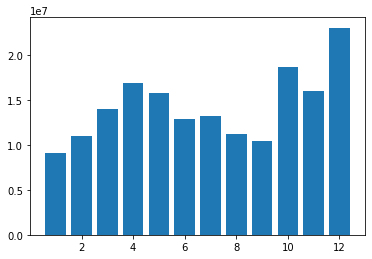

In [14]:
import matplotlib.pyplot as plt
df_res_sales = df_all_data.groupby('Month')['Sales'].sum()
plt.bar(df_res_sales.index,df_res_sales.values)
plt.show()

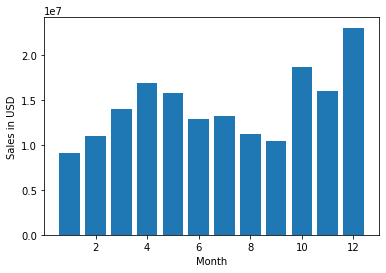

In [15]:
plt.bar(df_sales_by_month.index.month,df_sales_by_month.values)
plt.ylabel('Sales in USD')
plt.xlabel('Month')
plt.show()

# Question 2: What city had the highest number of sales

In [16]:
df_all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,150.00
1,222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00
2,222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84
3,222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84
4,222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95
5,222915,Bose SoundSport Headphones,1,99.99,2019-07-03 18:30:00,"899 Elm St, San Francisco, CA 94016",7,99.99
6,222916,Google Phone,1,600.00,2019-07-21 22:39:00,"745 Chestnut St, New York City, NY 10001",7,600.00
7,222917,LG Dryer,1,600.00,2019-07-17 13:44:00,"490 Adams St, New York City, NY 10001",7,600.00
8,222918,USB-C Charging Cable,1,11.95,2019-07-14 21:16:00,"207 1st St, Los Angeles, CA 90001",7,11.95
9,222919,Lightning Charging Cable,1,14.95,2019-07-14 13:24:00,"29 Jefferson St, Dallas, TX 75001",7,14.95


In [17]:
# Transform Purchase Address column to get just the city name
df_cities = df_all_data.copy()
series_sales_by_cities = df_cities.groupby(by=df_cities['Purchase Address'].map(lambda x: x.split(',')[1]))['Sales'].sum()
series_sales_by_cities

Purchase Address
 Atlanta         13,977,492.90
 Austin           9,097,908.75
 Boston          18,308,210.05
 Dallas          13,839,877.00
 Los Angeles     27,262,854.00
 New York City   23,321,587.15
 Portland        11,602,453.05
 San Francisco   41,311,019.55
 Seattle         13,738,777.40
Name: Sales, dtype: float64

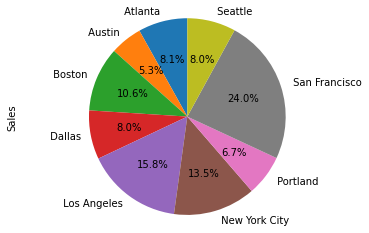

In [18]:
series_sales_by_cities.plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.show()

In [19]:
df_all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,150.00
1,222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00
2,222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84
3,222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84
4,222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95
...,...,...,...,...,...,...,...,...
931520,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95
931521,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68
931522,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00
931523,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99


# Get percentage relation of total sale by products and range of 6 months

In [20]:
sales_by_date_product = df_all_data.groupby(by=['Product',pd.Grouper(key='Order Date',axis=0,freq='6M')])['Sales'].sum()
sales_by_date_product


Product                     Order Date
20in Monitor                2019-01-31      118,239.25
                            2019-07-31    1,075,152.25
                            2020-01-31    1,077,352.05
27in 4K Gaming Monitor      2019-01-31      608,384.40
                            2019-07-31    5,748,452.60
                            2020-01-31    5,818,650.80
27in FHD Monitor            2019-01-31      314,229.05
                            2019-07-31    2,761,315.90
                            2020-01-31    2,586,577.55
34in Ultrawide Monitor      2019-01-31      596,584.30
                            2019-07-31    5,804,347.25
                            2020-01-31    5,376,858.50
AA Batteries (4-pack)       2019-01-31       27,340.80
                            2019-07-31      255,801.60
                            2020-01-31      247,449.60
AAA Batteries (4-pack)      2019-01-31       23,845.25
                            2019-07-31      221,917.80
                          

In [21]:
sales_by_date_product.groupby(level=0).sum()

Product
20in Monitor                  2,270,743.55
27in 4K Gaming Monitor       12,175,487.80
27in FHD Monitor              5,662,122.50
34in Ultrawide Monitor       11,777,790.05
AA Batteries (4-pack)           530,592.00
AAA Batteries (4-pack)          463,704.15
Apple Airpods Headphones     11,745,750.00
Bose SoundSport Headphones    6,727,827.15
Flatscreen TV                 7,228,500.00
Google Phone                 16,596,000.00
LG Dryer                      1,938,000.00
LG Washing Machine            1,998,000.00
Lightning Charging Cable      1,735,470.75
Macbook Pro Laptop           40,188,000.00
ThinkPad Laptop              20,649,793.50
USB-C Charging Cable          1,432,506.25
Vareebadd Phone               4,136,000.00
Wired Headphones              1,232,392.15
iPhone                       23,971,500.00
Name: Sales, dtype: float64

In [22]:
normalized_subset = sales_by_date_product.div(sales_by_date_product.groupby(level=0).sum(),axis=0)
normalized_subset

Product                     Order Date
20in Monitor                2019-01-31   0.05
                            2019-07-31   0.47
                            2020-01-31   0.47
27in 4K Gaming Monitor      2019-01-31   0.05
                            2019-07-31   0.47
                            2020-01-31   0.48
27in FHD Monitor            2019-01-31   0.06
                            2019-07-31   0.49
                            2020-01-31   0.46
34in Ultrawide Monitor      2019-01-31   0.05
                            2019-07-31   0.49
                            2020-01-31   0.46
AA Batteries (4-pack)       2019-01-31   0.05
                            2019-07-31   0.48
                            2020-01-31   0.47
AAA Batteries (4-pack)      2019-01-31   0.05
                            2019-07-31   0.48
                            2020-01-31   0.47
Apple Airpods Headphones    2019-01-31   0.05
                            2019-07-31   0.49
                            2020-01-31   

<AxesSubplot:ylabel='Order Date'>

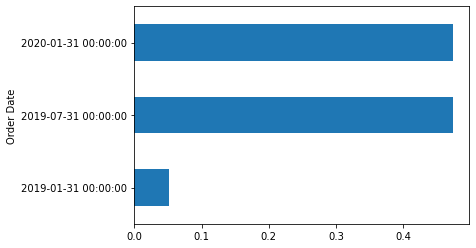

In [23]:
normalized_subset.loc['20in Monitor'].plot(kind='barh',stacked=True)

# What time should we display advertisements to maximize likelihood of customer's buying product?

In [24]:
df_all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,150.00
1,222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00
2,222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84
3,222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84
4,222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95
...,...,...,...,...,...,...,...,...
931520,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95
931521,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68
931522,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00
931523,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99


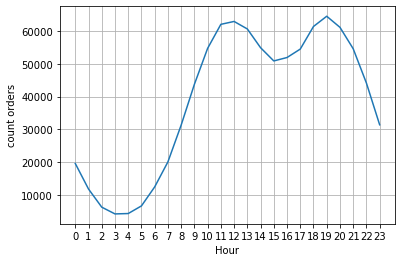

In [25]:
df_order_by_hour = df_all_data.groupby(df_all_data['Order Date'].dt.hour)['Order ID'].count()
hours = df_order_by_hour.index
plt.plot(hours,df_order_by_hour.values)
plt.xlabel("Hour")
plt.ylabel("count orders")
plt.xticks(hours)
plt.grid()
plt.show()

In [26]:
#cut
#resample

In [27]:
df_all_data.groupby('Order ID').value_counts()

Order ID  Product                     Quantity Ordered  Price Each  Order Date           Purchase Address                        Month  Sales 
141234    iPhone                      1                 700.00      2019-01-22 21:25:00  944 Walnut St, Boston, MA 02215         1      700.00    5
141235    Lightning Charging Cable    1                 14.95       2019-01-28 14:15:00  185 Maple St, Portland, OR 97035        1      14.95     5
141236    Wired Headphones            2                 11.99       2019-01-17 13:33:00  538 Adams St, San Francisco, CA 94016   1      23.98     5
141237    27in FHD Monitor            1                 149.99      2019-01-05 20:33:00  738 10th St, Los Angeles, CA 90001      1      149.99    5
141238    Wired Headphones            1                 11.99       2019-01-25 11:59:00  387 10th St, Austin, TX 73301           1      11.99     5
                                                                                                                     

# What product are more often sold together?

In [28]:
df_products_sold_together = df_all_data[df_all_data['Order ID'].duplicated()].sort_values(by='Order ID',axis=0,ascending=False)
df_products_sold_together

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
931524,319670,Bose SoundSport Headphones,1,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001",12,99.99
777161,319670,Bose SoundSport Headphones,1,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001",12,99.99
468435,319670,Bose SoundSport Headphones,1,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001",12,99.99
622798,319670,Bose SoundSport Headphones,1,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001",12,99.99
622797,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99
...,...,...,...,...,...,...,...,...
544307,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95
544306,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00
853032,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00
698669,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00


In [29]:
df_products_sold_together.groupby(['Order ID','Product'])['Quantity Ordered'].count().sort_values(ascending=False)

Order ID  Product                   
178158    USB-C Charging Cable          10
226625    Wired Headphones              10
182523    Lightning Charging Cable      10
168777    Lightning Charging Cable      10
259297    Lightning Charging Cable      10
                                        ..
201908    AAA Batteries (4-pack)         4
201909    Lightning Charging Cable       4
201910    AAA Batteries (4-pack)         4
201911    Apple Airpods Headphones       4
319670    Bose SoundSport Headphones     4
Name: Quantity Ordered, Length: 185639, dtype: int64

In [35]:
df_products_sold_together['Grouped'] = df_products_sold_together.groupby(['Order ID'])['Product'].transform(lambda x: ', '.join(x))
df_products_sold_together.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Grouped
931524,319670,Bose SoundSport Headphones,1,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001",12,99.99,"Bose SoundSport Headphones, Bose SoundSport He..."
777161,319670,Bose SoundSport Headphones,1,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001",12,99.99,"Bose SoundSport Headphones, Bose SoundSport He..."
468435,319670,Bose SoundSport Headphones,1,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001",12,99.99,"Bose SoundSport Headphones, Bose SoundSport He..."
622798,319670,Bose SoundSport Headphones,1,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001",12,99.99,"Bose SoundSport Headphones, Bose SoundSport He..."
622797,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,"Wired Headphones, Wired Headphones, Wired Head..."
931523,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,"Wired Headphones, Wired Headphones, Wired Head..."
468434,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,"Wired Headphones, Wired Headphones, Wired Head..."
777160,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,"Wired Headphones, Wired Headphones, Wired Head..."
777159,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,"Vareebadd Phone, Vareebadd Phone, Vareebadd Ph..."
468433,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,"Vareebadd Phone, Vareebadd Phone, Vareebadd Ph..."


In [37]:
df = df_products_sold_together[['Order ID','Grouped']].drop_duplicates()
df.head(10)

,Order ID,Grouped
931524,319670,"Bose SoundSport Headphones, Bose SoundSport He..."
622797,319669,"Wired Headphones, Wired Headphones, Wired Head..."
777159,319668,"Vareebadd Phone, Vareebadd Phone, Vareebadd Ph..."
931521,319667,"AA Batteries (4-pack), AA Batteries (4-pack), ..."
931520,319666,"Lightning Charging Cable, Lightning Charging C..."
777156,319665,"iPhone, iPhone, iPhone, iPhone"
622792,319664,"ThinkPad Laptop, ThinkPad Laptop, ThinkPad Lap..."
622791,319663,"Flatscreen TV, Flatscreen TV, Flatscreen TV, F..."
931516,319662,"Bose SoundSport Headphones, Bose SoundSport He..."
622789,319661,"AAA Batteries (4-pack), AAA Batteries (4-pack)..."


In [96]:
from itertools import combinations
from collections import Counter

counter = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    counter.update(Counter(combinations(row_list,2)))

print(counter)

Counter({(' USB-C Charging Cable', ' USB-C Charging Cable'): 75515, (' Lightning Charging Cable', ' Lightning Charging Cable'): 73217, (' AAA Batteries (4-pack)', ' AAA Batteries (4-pack)'): 65295, (' AA Batteries (4-pack)', ' AA Batteries (4-pack)'): 64681, (' Wired Headphones', ' Wired Headphones'): 64211, ('USB-C Charging Cable', ' USB-C Charging Cable'): 63789, ('Lightning Charging Cable', ' Lightning Charging Cable'): 63450, ('AAA Batteries (4-pack)', ' AAA Batteries (4-pack)'): 61183, ('AA Batteries (4-pack)', ' AA Batteries (4-pack)'): 60969, ('Wired Headphones', ' Wired Headphones'): 55074, (' Apple Airpods Headphones', ' Apple Airpods Headphones'): 50618, ('Apple Airpods Headphones', ' Apple Airpods Headphones'): 45712, (' Bose SoundSport Headphones', ' Bose SoundSport Headphones'): 43506, ('Bose SoundSport Headphones', ' Bose SoundSport Headphones'): 39216, (' iPhone', ' iPhone'): 24309, (' 27in FHD Monitor', ' 27in FHD Monitor'): 23654, ('27in FHD Monitor', ' 27in FHD Monito

In [97]:
counter.most_common(10)

[((' USB-C Charging Cable', ' USB-C Charging Cable'), 75515),
 ((' Lightning Charging Cable', ' Lightning Charging Cable'), 73217),
 ((' AAA Batteries (4-pack)', ' AAA Batteries (4-pack)'), 65295),
 ((' AA Batteries (4-pack)', ' AA Batteries (4-pack)'), 64681),
 ((' Wired Headphones', ' Wired Headphones'), 64211),
 (('USB-C Charging Cable', ' USB-C Charging Cable'), 63789),
 (('Lightning Charging Cable', ' Lightning Charging Cable'), 63450),
 (('AAA Batteries (4-pack)', ' AAA Batteries (4-pack)'), 61183),
 (('AA Batteries (4-pack)', ' AA Batteries (4-pack)'), 60969),
 (('Wired Headphones', ' Wired Headphones'), 55074)]

# What product sold the most?

In [144]:
product_group = df_all_data.groupby('Product')['Sales'].sum()
most_pg = product_group.sort_values()
most_pg

Product
AAA Batteries (4-pack)          463,704.15
AA Batteries (4-pack)           530,592.00
Wired Headphones              1,232,392.15
USB-C Charging Cable          1,432,506.25
Lightning Charging Cable      1,735,470.75
LG Dryer                      1,938,000.00
LG Washing Machine            1,998,000.00
20in Monitor                  2,270,743.55
Vareebadd Phone               4,136,000.00
27in FHD Monitor              5,662,122.50
Bose SoundSport Headphones    6,727,827.15
Flatscreen TV                 7,228,500.00
Apple Airpods Headphones     11,745,750.00
34in Ultrawide Monitor       11,777,790.05
27in 4K Gaming Monitor       12,175,487.80
Google Phone                 16,596,000.00
ThinkPad Laptop              20,649,793.50
iPhone                       23,971,500.00
Macbook Pro Laptop           40,188,000.00
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Product'>

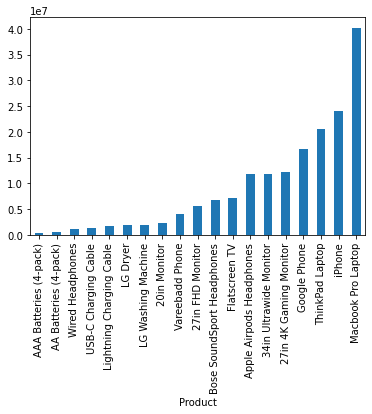

In [145]:
most_pg.plot.bar()

In [160]:
quantity_order = df_all_data.groupby(['Product']).sum()['Quantity Ordered']
quantity_order = quantity_order.sort_values()
quantity_order

Product
LG Dryer                        3230
LG Washing Machine              3330
Vareebadd Phone                10340
20in Monitor                   20645
ThinkPad Laptop                20650
Macbook Pro Laptop             23640
Flatscreen TV                  24095
Google Phone                   27660
34in Ultrawide Monitor         30995
27in 4K Gaming Monitor         31220
iPhone                         34245
27in FHD Monitor               37750
Bose SoundSport Headphones     67285
Apple Airpods Headphones       78305
Wired Headphones              102785
Lightning Charging Cable      116085
USB-C Charging Cable          119875
AA Batteries (4-pack)         138175
AAA Batteries (4-pack)        155085
Name: Quantity Ordered, dtype: int64

# Product most ordered

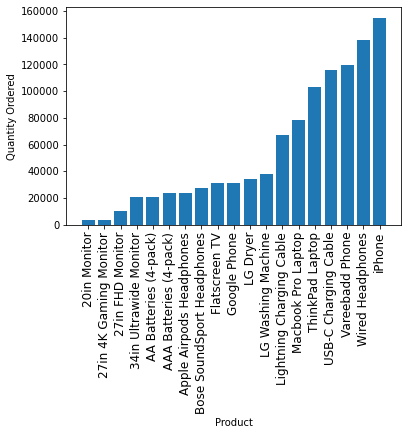

In [161]:
product = [product for product, df in df_all_data.groupby('Product')]
plt.bar(product,quantity_order)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(product,rotation='vertical',size=12)
plt.show()

# Comparative between mean price and orders of a product

/tmp/ipykernel_69778/2076362656.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product,rotation='vertical',size=12)


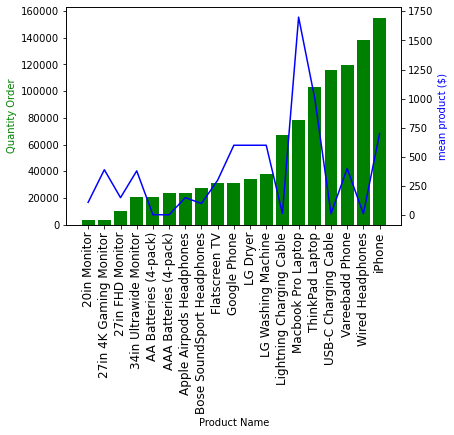

In [157]:
prices = df_all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product,quantity_order,color="g")
ax2.plot(product,prices,'-b')

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Order",color="g")
ax2.set_ylabel("mean product ($)",color="b")
ax1.set_xticklabels(product,rotation='vertical',size=12)

plt.show()